In [83]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import functools
import operator

In [84]:
weather_data = pd.read_csv('../data/Plant_1_Weather_Sensor_Data.csv')
gen_data = pd.read_csv('../data/Plant_1_Generation_Data.csv')

In [85]:
weather_data['DATE_TIME']= pd.to_datetime(weather_data['DATE_TIME'])
gen_data['DATE_TIME']= pd.to_datetime(gen_data['DATE_TIME'])

In [86]:
weather_data['DAY'] = pd.DatetimeIndex(weather_data['DATE_TIME']).dayofyear
weather_data['TIME'] = weather_data.DATE_TIME.dt.hour * 60 + weather_data.DATE_TIME.dt.minute
weather_data['Time'] = weather_data.DATE_TIME.dt.time
weather_data['HOUR'] = weather_data.DATE_TIME.dt.hour
weather_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,TIME,Time,HOUR
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,0,00:00:00,0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,136,15,00:15:00,0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,136,30,00:30:00,0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,136,45,00:45:00,0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,136,60,01:00:00,1


In [87]:
merged_df = pd.merge(gen_data, weather_data, how='inner', on=['DATE_TIME'], suffixes=('', '_y'))
merged_df

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,TIME,Time,HOUR
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,0,00:00:00,0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,0,00:00:00,0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,0,00:00:00,0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,0,00:00:00,0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,0,00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,169,1425,23:45:00,23
68770,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,169,1425,23:45:00,23
68771,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,169,1425,23:45:00,23
68772,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,169,1425,23:45:00,23


## Plot irradiation vs DC power for a single inverter for all days

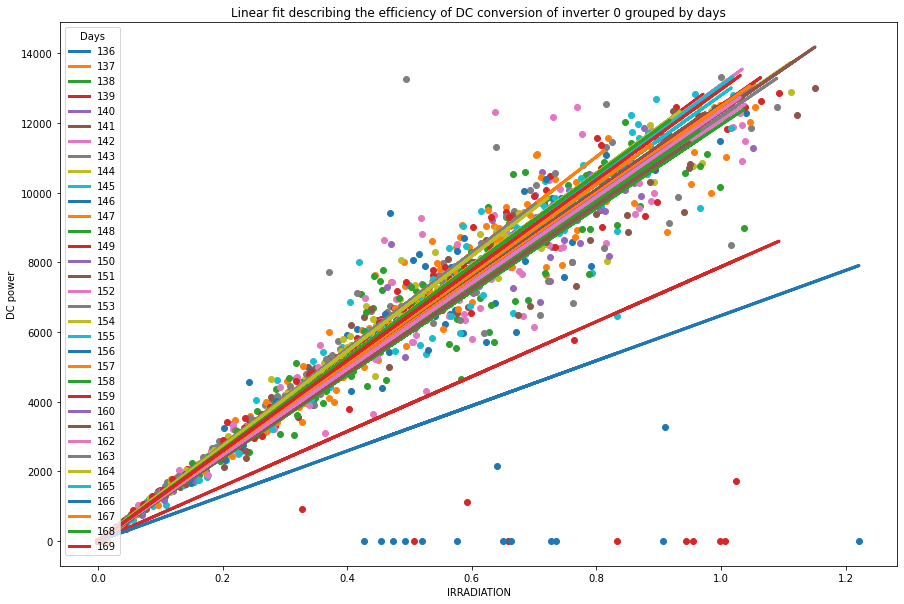

In [88]:
coeff=[]
inv0=merged_df[merged_df.SOURCE_KEY==merged_df.SOURCE_KEY[0]]
plt.figure(figsize=(15, 10))
for a, day in inv0.groupby(inv0.DAY):
    X = day['IRRADIATION'].values.reshape(-1,1)
    y = day['DC_POWER'].values.reshape(-1,1)
    regressor = LinearRegression(fit_intercept=False)
    plt.scatter(day['IRRADIATION'], day['DC_POWER'])
    regressor.fit(X, y)
    m=regressor.coef_
    result = []
    [result.extend(el) for el in m] 
    E=[]
    for el in result:
        E.append(el)
    plt.plot(day['IRRADIATION'], E*day['IRRADIATION'] , linewidth=3)
    coeff.append(E)
    coefficients = pd.DataFrame(data=np.array(coeff), columns=['lin_fit_coeff'])
coefficients['DAY'] = merged_df['DAY'].unique()
plt.legend(inv0.DAY.unique(), loc="upper left", title="Days")
plt.xlabel('IRRADIATION')
plt.ylabel('DC power')
plt.title("Linear fit describing the efficiency of DC conversion of inverter 0 grouped by days")
plt.show()

In [89]:
#Removing the outliers to have a better fit of the data
clean_data=merged_df.copy()
for i, j in  clean_data.groupby(clean_data.HOUR):
    outlier_condition1=j['DC_POWER']>=(j['DC_POWER'].mean()+ 3*j['DC_POWER'].std())
    outlier_condition2=j['DC_POWER']<(j['DC_POWER'].mean()- 3*j['DC_POWER'].std())
    clean_data.drop(clean_data.loc[(clean_data['DAY'].isin(j.loc[outlier_condition1|outlier_condition2].DAY))&(clean_data['HOUR']==i)].index, inplace=True)

<Figure size 1080x720 with 0 Axes>

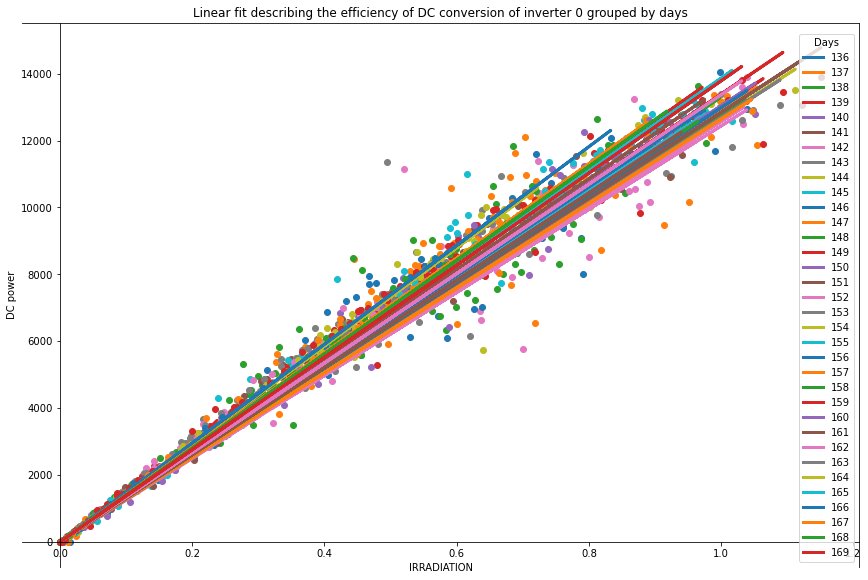

In [154]:
coeff=[]
inv0=clean_data[clean_data.SOURCE_KEY==clean_data.SOURCE_KEY.unique()[1]]
plt.figure(figsize=(15, 10))
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
for a, day in inv0.groupby(inv0.DAY):
    X = day['IRRADIATION'].values.reshape(-1,1)
    y = day['DC_POWER'].values.reshape(-1,1)
    regressor = LinearRegression(fit_intercept=False)
    plt.scatter(day['IRRADIATION'], day['DC_POWER'])
    regressor.fit(X, y)
    m=regressor.coef_
    result = []
    [result.extend(el) for el in m] 
    E=[]
    for el in result:
        E.append(el)
    plt.plot(day['IRRADIATION'], E*day['IRRADIATION'] , linewidth=3)
    coeff.append(E)
    coefficients = pd.DataFrame(data=np.array(coeff), columns=['lin_fit_coeff'])
coefficients['DAY'] = merged_df['DAY'].unique()
plt.legend(inv0.DAY.unique(), loc="lower right", title="Days")
plt.xlabel('IRRADIATION')
plt.ylabel('DC power')
plt.title("Linear fit describing the efficiency of DC conversion of inverter 0 grouped by days")
plt.show()

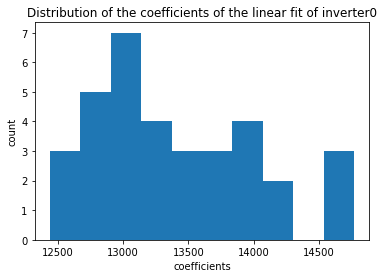

In [155]:
plt.hist(coefficients['lin_fit_coeff'])
plt.title('Distribution of the coefficients of the linear fit of inverter0')
plt.xlabel('coefficients')
plt.ylabel('count')
plt.show()

## Write a function that given the dataframe as input calculates the coefficients for every day and every inverter and returns a dataframe with the following columns Date, Inverter, Conversion_coeff.

In [156]:
def Irr_ac_linear_fit(data):
    coeff=[]
    days=[]
    inverters=[]
    for i in data.SOURCE_KEY.unique():
        inv_data=data[data.SOURCE_KEY==i]
        for a, day in inv_data.groupby(inv_data.DAY):
            inverters.append(i)
            INV=pd.DataFrame(data=np.array(inverters), columns=['Inverter'])
            days.append(a)
            DAYS=pd.DataFrame(data=np.array(days), columns=['Day'])
            X = day['IRRADIATION'].values.reshape(-1,1)
            y = day['DC_POWER'].values.reshape(-1,1)
            regressor = LinearRegression(fit_intercept=False)
            regressor.fit(X, y)
            m=regressor.coef_
            result = []
            [result.extend(el) for el in m] 
            E=[]
            for el in result:
                E.append(el)
            coeff.append(E)
            coefficients = pd.DataFrame(data=np.array(coeff), columns=['Conversion_coeff'])
            conv = [INV, DAYS, coefficients]
            conversion_data = pd.concat(conv, axis=1)
    return(conversion_data)

In [157]:
conversion_data=Irr_ac_linear_fit(clean_data)
conversion_data.head()

,Inverter,Day,Conversion_coeff
0,1BY6WEcLGh8j5v7,136,12354.989316
1,1BY6WEcLGh8j5v7,137,13795.526206
2,1BY6WEcLGh8j5v7,138,12442.529876
3,1BY6WEcLGh8j5v7,139,13206.622964
4,1BY6WEcLGh8j5v7,140,12853.514593


Text(0, 0.5, 'inverter efficiency')

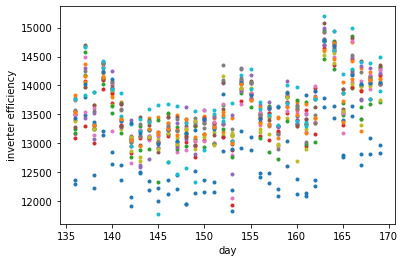

In [158]:
plt.figure()
for inv in conversion_data.Inverter.unique():
    plt.plot(conversion_data[conversion_data.Inverter==inv]['Day'], conversion_data[conversion_data.Inverter==inv]['Conversion_coeff'], '.', label=inv)
plt.xlabel('day')
plt.ylabel('inverter efficiency')
#plt.legend()

### AK there is a pattern in time. If it's the same for all inverters it means it might be some weather related factor. Let's check against cloudiness

In [159]:
def find_cloudiness(data, col_name):
    data['DATE_TIME']= pd.to_datetime(data['DATE_TIME'])
    data['DAY'] = pd.DatetimeIndex(data['DATE_TIME']).dayofyear
    data['TIME'] = data.DATE_TIME.dt.time
    data['HOUR'] = data.DATE_TIME.dt.hour
    agg_h_irr = data.groupby(data.TIME).agg({col_name: 'max'})
    #Removing outliers 
    clean_data=data.copy()
    for i, j in  clean_data.groupby(clean_data.HOUR):
        outlier_condition1=(j[col_name]!=0)&(j[col_name]>=(j[col_name].mean()+ 2*j[col_name].std()))
        outlier_condition2=(j[col_name]!=0)&(j[col_name]<(j[col_name].mean()- 2*j[col_name].std()))
        clean_data.drop(clean_data.loc[(clean_data['DAY'].isin(j.loc[outlier_condition1|outlier_condition2].DAY))&
                                       (clean_data['HOUR']==i)].index, inplace=True)
    agg_h_irr_clean = clean_data.groupby(clean_data.TIME).agg({col_name: 'max'})
    weather_maxirr = pd.merge(data, agg_h_irr_clean, how='inner', on='TIME', suffixes=('', '_max'))
    weather_maxirr['offset_from_max']=(weather_maxirr[col_name+'_max']-weather_maxirr[col_name])**2
    C_day_list=weather_maxirr.groupby('DAY').sum()['offset_from_max']
    weather_maxirr = pd.merge(weather_maxirr, C_day_list, how='inner', on='DAY')
    weather_maxirr_new = weather_maxirr.rename(columns={'offset_from_max_y': 'C_day', 
                                                        'offset_from_max_x': 'offset_from_max'})
    ###sorry ehre returning just day-value array, because it is easier for the plot. we'll figure out eventually what we need to return
    return(C_day_list)

In [160]:
C_day=find_cloudiness(weather_data, 'IRRADIATION')

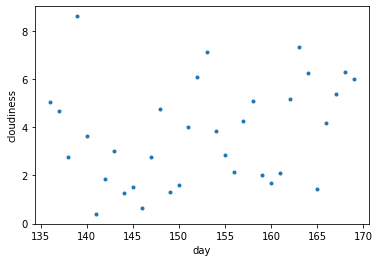

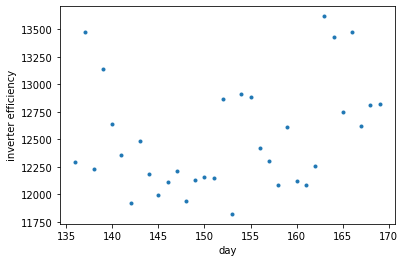

In [161]:
plt.figure()
plt.plot(C_day.index, C_day, '.')
plt.xlabel('day')
plt.ylabel('cloudiness')
plt.figure()
for inv in conversion_data.Inverter.unique()[10:11]:
    plt.plot(conversion_data[conversion_data.Inverter==inv]['Day'], conversion_data[conversion_data.Inverter==inv]['Conversion_coeff'], '.')
    plt.xlabel('day')
    plt.ylabel('inverter efficiency')

### AK the pattern we were seeing is clearly weather related, and it is correlated with C_day (although its a mistery why its correlated and not anticorrelated...). This means our method somehow is not removing completely the effect of irradiation on DC power. Our coefficient, even if its supposed to be independent from irradiation (it represents DC/Irr), is resulting dependent on it. This will also be visible if we plot the coefficient against C_day

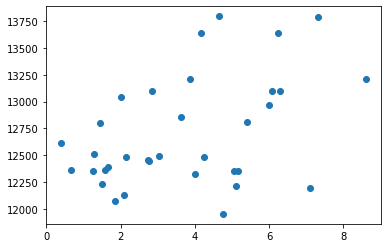

In [164]:
inv='1BY6WEcLGh8j5v7'
plt.scatter(C_day, conversion_data[conversion_data.Inverter==inv]['Conversion_coeff'])

### AK there is a slight positive correlation (the points are aligned diagonally)

### AK let's check if it could be some affect due to the other variables that add secondary effects on the DC power

<AxesSubplot:xlabel='IRRADIATION', ylabel='DC_POWER'>

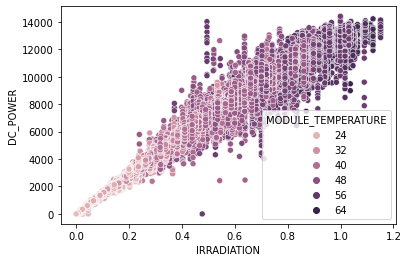

In [98]:
import seaborn as sns
sns.scatterplot(data=clean_data, x='IRRADIATION', y= 'DC_POWER', hue='MODULE_TEMPERATURE')

<AxesSubplot:xlabel='IRRADIATION', ylabel='DC_POWER'>

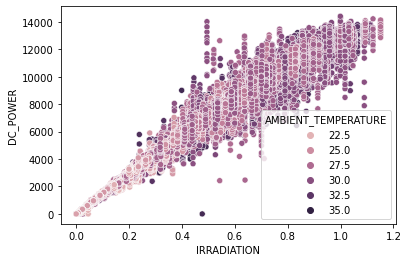

In [99]:
import seaborn as sns
sns.scatterplot(data=clean_data, x='IRRADIATION', y= 'DC_POWER', hue='AMBIENT_TEMPERATURE')

<AxesSubplot:xlabel='MODULE_TEMPERATURE', ylabel='DC_POWER'>

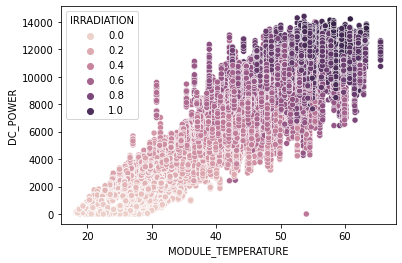

In [100]:
sns.scatterplot(data=clean_data, x='MODULE_TEMPERATURE', y= 'DC_POWER', hue='IRRADIATION')

<AxesSubplot:xlabel='AMBIENT_TEMPERATURE', ylabel='DC_POWER'>

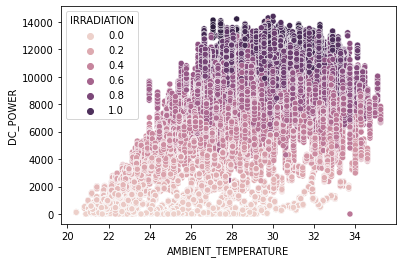

In [101]:
sns.scatterplot(data=clean_data, x='AMBIENT_TEMPERATURE', y= 'DC_POWER', hue='IRRADIATION')

#### AK its not so clear from these plots, but there might be secondary effects due to module temperature and ambient temperature

#### AK to understand whether there are secondary effects let's try to see the residuals of the linear fits

In [103]:
conversion_data.columns

Index(['Inverter', 'Day', 'Conversion_coeff'], dtype='object')

In [104]:
conversion_data.columns=['SOURCE_KEY', 'DAY', 'Conversion_coeff']
clean_data = pd.merge(clean_data, conversion_data, how='left', on=['DAY', 'SOURCE_KEY'])

In [105]:
clean_data['residuals']=clean_data['DC_POWER']-clean_data['IRRADIATION']*clean_data['Conversion_coeff']

<AxesSubplot:xlabel='IRRADIATION', ylabel='residuals'>

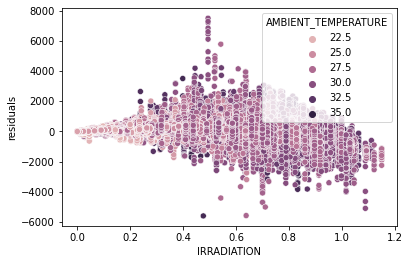

In [106]:
sns.scatterplot(data=clean_data, x='IRRADIATION', y= 'residuals', hue='AMBIENT_TEMPERATURE')

#### AK the fact that residuals are near 0 and don't show much trend towards up or down shows that we removed a lot of the irradiation effect from DC_POWER, but for the very high values of irradiation you can notice the tail going down. This is probably the effect of the rounding of the IRRADIATIOn vs DC_POWER relationship. if you remember I was originally thinking it was slightly curved for high irradiation. So the linear fit is not perfect. And it could potentially explain the correlation (ancd not anticorrelation) of the coefficient with C_day

<AxesSubplot:xlabel='AMBIENT_TEMPERATURE', ylabel='residuals'>

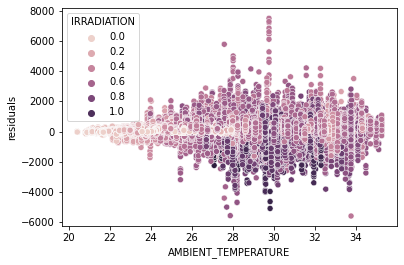

In [107]:
sns.scatterplot(data=clean_data, x='AMBIENT_TEMPERATURE', y= 'residuals', hue='IRRADIATION')

#### AK I think this plot shows there is no relationship with ambient temperature (resiaduals all cenetered at 0) hence also any of its effects, hence probably also the module temperature, which should be the effect of irradiation and ambient.Then the remaining relationship we are seeing is probably due to the faxt that we made a linear fit and the relationship of dc with irradiation is not linear for whatever reason (technical limitations of the panels?)

<AxesSubplot:xlabel='IRRADIATION', ylabel='residuals'>

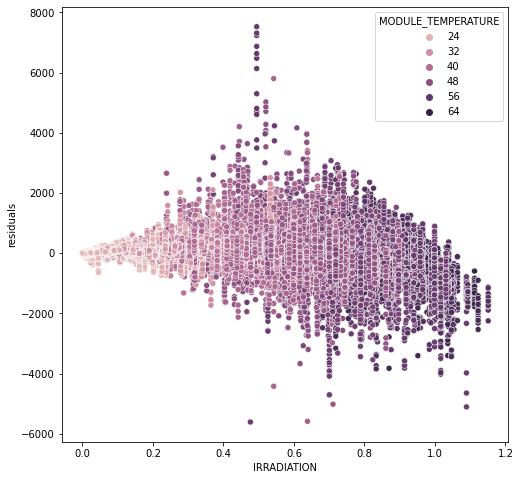

In [170]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=clean_data, x='IRRADIATION', y= 'residuals', hue='MODULE_TEMPERATURE')

<AxesSubplot:xlabel='MODULE_TEMPERATURE', ylabel='residuals'>

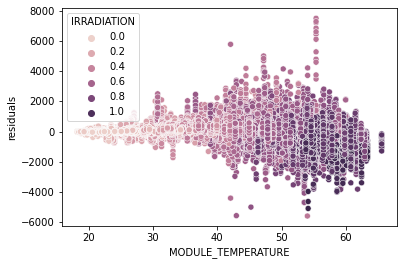

In [109]:
sns.scatterplot(data=clean_data, x='MODULE_TEMPERATURE', y= 'residuals', hue='IRRADIATION')

<AxesSubplot:xlabel='MODULE_TEMPERATURE', ylabel='DC_POWER'>

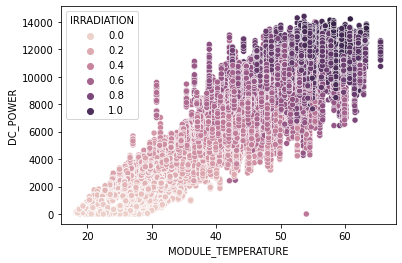

In [172]:
sns.scatterplot(data=clean_data, x='MODULE_TEMPERATURE', y= 'DC_POWER', hue="IRRADIATION")

<AxesSubplot:xlabel='MODULE_TEMPERATURE', ylabel='DC_POWER'>

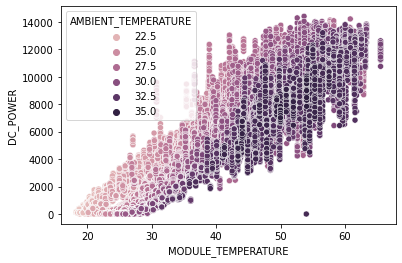

In [179]:
sns.scatterplot(data=clean_data.sort_values("AMBIENT_TEMPERATURE"), x='MODULE_TEMPERATURE', y= 'DC_POWER', hue="AMBIENT_TEMPERATURE")

<AxesSubplot:xlabel='MODULE_TEMPERATURE', ylabel='DC_POWER'>

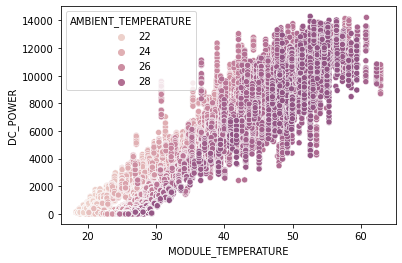

In [180]:
sns.scatterplot(data=clean_data[clean_data["AMBIENT_TEMPERATURE"]<30].sort_values("AMBIENT_TEMPERATURE"), x='MODULE_TEMPERATURE', y= 'DC_POWER', hue="AMBIENT_TEMPERATURE", hue_norm=(22,35))

### AK what can we conclude from these four plots and in general? 
1. The dependence of DC power on irradiation was indeed not completely linear. It's probably curved towards lower DC power for high irradiation values. This affects our linear fit bringing the line towards lower values. Probably the hotter and clearer are the days the more curved is the dependence (see further for the explanation of why). Thus the coefficient is more biased due to this curvature on the clearest days, bringing to lower coefficient values for the clearest days (as opposed to the expected higher coefficient values for the clearest days).
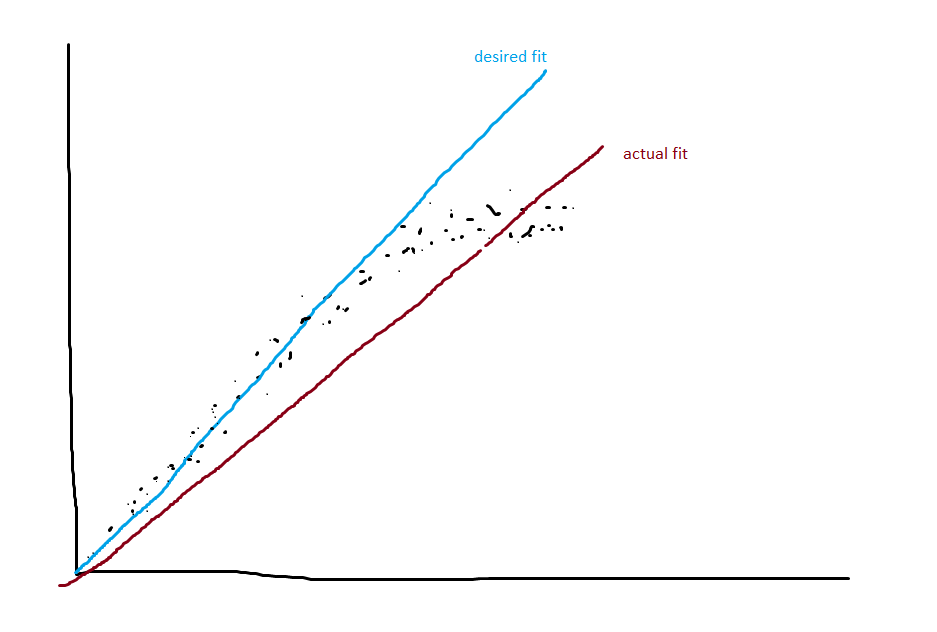
2. The curvature at high irradiation could be for intrinsic reasons (this is how the PV cells work) and so depend only on irradiation or could have a physical explanation (if the temperature of the PV cell grows above certain limit, its' efficiency drops) so the curvature depends on module temperature. It's hard to understand from the images above, but what I think I see is that the high ambient temperature and high module temperature is lowering the dependence DC production for the same module temperature(see the last two plots). Or that the combination of hgih irradiation and high module temperature is creating a DC conversion cut. See a light dependence on the module temperature at very high module temperature values. See how the DC power flattens out for very high module temperatures and high irradiation temepratures (third plot)? I think this is some combined effect and its hard to pinpoint where is it comign from, but the three quantities are very closely related. This proves that our simple approach of linear fit is not the best and for the final purpose we need to use something more complex, like the autoencoder (it could also be a simple linear rigression with more variables of course), which what we will do in the following weeks.
3. How do we derive the target variable though? This was the original scope of doing this analysis, right? For making inter inverter comparisons this approach can still work, because when comparing inverters in one single day this effect does not matter (you can still see if one inverter has lower efficiency than the other). But in case of your task, it is important to have all the weather effect excluded to be able to see the inverter behaviour changes in time without weather related noise. We could try to exclude the points with higher than certain temeperature, in order to exclude the curved parts of the depdendence and use just the linear part for the coefficient calculation, but this might also introduce some problems. Let's try to do that but also remember that we can't trust this method 100%.


In [182]:
conversion_data_lowT=Irr_ac_linear_fit(clean_data[clean_data['MODULE_TEMPERATURE']<=50])
conversion_data_lowT.head()

,Inverter,Day,Conversion_coeff
0,1BY6WEcLGh8j5v7,136,12924.970538
1,1BY6WEcLGh8j5v7,137,13815.536204
2,1BY6WEcLGh8j5v7,138,12746.229788
3,1BY6WEcLGh8j5v7,139,13327.496551
4,1BY6WEcLGh8j5v7,140,12703.448285


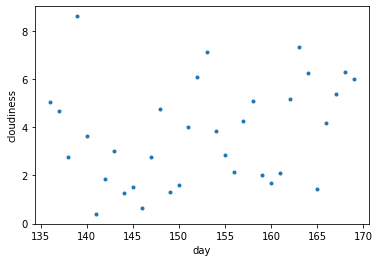

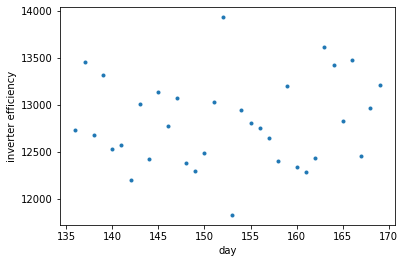

In [183]:
plt.figure()
plt.plot(C_day.index, C_day, '.')
plt.xlabel('day')
plt.ylabel('cloudiness')
plt.figure()
for inv in conversion_data_lowT.Inverter.unique()[10:11]:
    plt.plot(conversion_data_lowT[conversion_data_lowT.Inverter==inv]['Day'], conversion_data_lowT[conversion_data_lowT.Inverter==inv]['Conversion_coeff'], '.')
    plt.xlabel('day')
    plt.ylabel('inverter efficiency')

Text(0, 0.5, 'inverter efficiency')

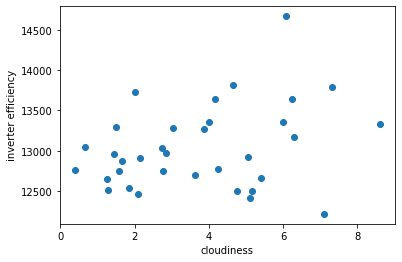

In [187]:
inv='1BY6WEcLGh8j5v7'
plt.scatter(C_day, conversion_data_lowT[conversion_data_lowT.Inverter==inv]['Conversion_coeff'])
plt.xlabel("cloudiness")
plt.ylabel("inverter efficiency")

Text(0, 0.5, 'inverter efficiency')

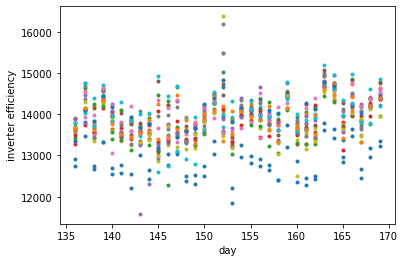

In [189]:
plt.figure()
for inv in conversion_data_lowT.Inverter.unique():
    plt.plot(conversion_data_lowT[conversion_data_lowT.Inverter==inv]['Day'], conversion_data_lowT[conversion_data_lowT.Inverter==inv]['Conversion_coeff'], '.', label=inv)
plt.xlabel('day')
plt.ylabel('inverter efficiency')

#### AK yay, the situation is much better (see the first plots), but there is still something (the very last plot). If we try to derive time related behaviour changes we will still be just seeing the weather effect.
1. we can try to deriv eonly very extreme anomalies, or strong trends in time. 
2. or we can just concentrate on something that finds inter-inverter differences and leave the time related changes either completely, or to be approached with a more complex solution

In [204]:
trends=[]
for inv in conversion_data_lowT.Inverter.unique():
    trends.append(conversion_data_lowT[conversion_data_lowT.Inverter==inv][['Day', 'Conversion_coeff']].corr()['Conversion_coeff']['Day'])
    

In [205]:
trends

[0.10361243556212073,
 0.2897478173605649,
 0.3114464381865768,
 0.3287011452615103,
 0.3719917445466394,
 0.19416705994763578,
 0.22291629393688822,
 0.12987150468965958,
 0.39038339889155127,
 0.27360139006171486,
 0.10757073139743539,
 0.4392646421406632,
 0.16619520249959865,
 0.44481291764818387,
 0.43065832938243526,
 0.4153996067478574,
 0.42859649498421576,
 0.2649601188964075,
 0.09909427310781031,
 0.34570472800139257,
 0.4069879955599238,
 0.25271449781910404]

Text(0.5, 1.0, 'inverters with supposedly less trend over days')

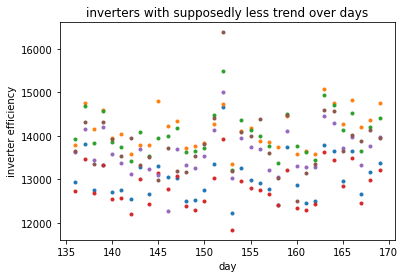

In [207]:
for inv in conversion_data_lowT.Inverter.unique()[np.array(trends)<0.2]:
    plt.plot(conversion_data_lowT[conversion_data_lowT.Inverter==inv]['Day'], conversion_data_lowT[conversion_data_lowT.Inverter==inv]['Conversion_coeff'], '.', label=inv)
plt.xlabel('day')
plt.ylabel('inverter efficiency')
plt.title("inverters with supposedly less trend over days")

Text(0.5, 1.0, 'inverters with supposedly some trend over days')

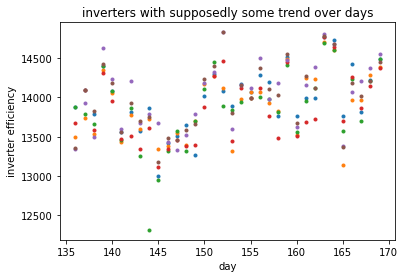

In [208]:
for inv in conversion_data_lowT.Inverter.unique()[np.array(trends)>0.4]:
    plt.plot(conversion_data_lowT[conversion_data_lowT.Inverter==inv]['Day'], conversion_data_lowT[conversion_data_lowT.Inverter==inv]['Conversion_coeff'], '.', label=inv)
plt.xlabel('day')
plt.ylabel('inverter efficiency')
plt.title("inverters with supposedly some trend over days")

### AK indeed in the last plot there is a slight growing trend from day 145 on. Instead the plot before shows no trend and is dominated by the weather variations

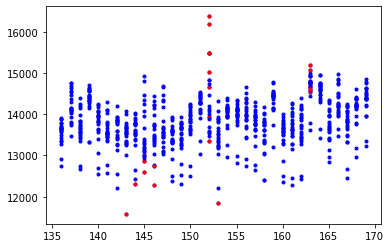

In [213]:
outlier_coeff=2
for inv in conversion_data_lowT.Inverter.unique():
    limit_down=conversion_data_lowT[conversion_data_lowT.Inverter==inv]['Conversion_coeff'].mean()-outlier_coeff*conversion_data_lowT[conversion_data_lowT.Inverter==inv]['Conversion_coeff'].std()
    outliers_low=conversion_data_lowT[conversion_data_lowT.Inverter==inv]['Conversion_coeff']<=limit_down
    limit_up=conversion_data_lowT[conversion_data_lowT.Inverter==inv]['Conversion_coeff'].mean()+outlier_coeff*conversion_data_lowT[conversion_data_lowT.Inverter==inv]['Conversion_coeff'].std()
    outliers_high=conversion_data_lowT[conversion_data_lowT.Inverter==inv]['Conversion_coeff']>=limit_up
    plt.plot(conversion_data_lowT[conversion_data_lowT.Inverter==inv]['Day'], conversion_data_lowT[conversion_data_lowT.Inverter==inv]['Conversion_coeff'], 'b.')
    plt.plot(conversion_data_lowT[conversion_data_lowT.Inverter==inv][outliers_low]['Day'], conversion_data_lowT[conversion_data_lowT.Inverter==inv][outliers_low]['Conversion_coeff'], 'r.')
    plt.plot(conversion_data_lowT[conversion_data_lowT.Inverter==inv][outliers_high]['Day'], conversion_data_lowT[conversion_data_lowT.Inverter==inv][outliers_high]['Conversion_coeff'], 'r.')

### AK to not spend too much time on finalising this activity let's just write 3 simple functions that take the coeficients and 
1. derive the inverters if there is any negative trend present
2. derive strong outliers in time, like above
3. derive inverters that are shifted from the other inverters in one day (inter-inverter differences)
4. derive inverters that are shifted from other inverters for longer periods (long-term, inter-inverter behaviour).

#### AK these are just some addiitonal plots to see better how are the irradiation, ambient temperature and module temperature relatedsns.scatterplot(data=clean_data, y='MODULE_TEMPERATURE', x= 'IRRADIATION', hue='AMBIENT_TEMPERATURE')

<AxesSubplot:xlabel='IRRADIATION', ylabel='MODULE_TEMPERATURE'>

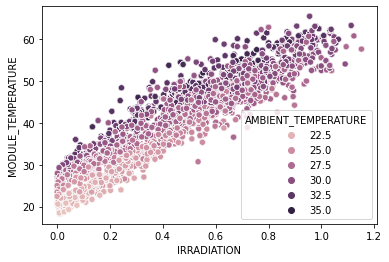

In [191]:
sns.scatterplot(data=clean_data, y='MODULE_TEMPERATURE', x= 'IRRADIATION', hue='AMBIENT_TEMPERATURE')

### AK from the above plot its clear that module temeprature is a result of both effects irradiation and ambient temperature. because for each range of ambient temperature there is a specific strip of module temeprature vs irradiation dependence. this means also ambient temperature has effect on module temperature. 

#### Study this dataframe by looking at one inverters coefficients over the month and see if you can recognise variations in the inverters coefficients in the original DC power against time plot.

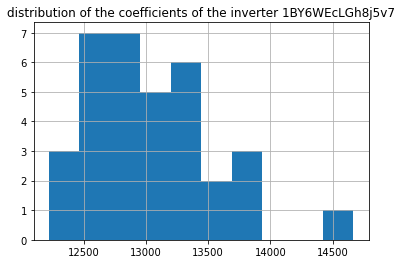

In [185]:
conversion_data_lowT.columns=['Inverter', 'Day', 'Conversion_coeff']
inv0=conversion_data_lowT[conversion_data_lowT.Inverter== conversion_data_lowT.Inverter.unique()[0]]
inv0.Conversion_coeff.hist()
plt.title('distribution of the coefficients of the inverter '+ inv0.Inverter[0])
plt.show()

In [114]:
print(inv0[inv0.Conversion_coeff ==inv0.Conversion_coeff.max()])
print(inv0[inv0.Conversion_coeff==inv0.Conversion_coeff.min()])

          Inverter  Day  Conversion_coeff
1  1BY6WEcLGh8j5v7  137      13795.526206
           Inverter  Day  Conversion_coeff
12  1BY6WEcLGh8j5v7  148      11952.752813


TypeError: float() argument must be a string or a number, not 'datetime.time'

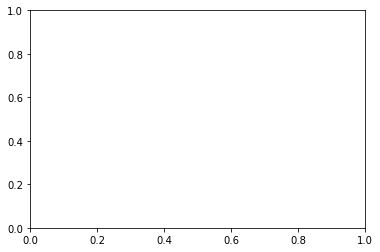

In [115]:
inverter0=clean_data[clean_data.SOURCE_KEY==inv0.Inverter[0]]
for a, day in inverter0.groupby(inverter0.DAY):
#     plt.figure(figsize=(15, 10))
    scale = 1 / 10
    plt.plot(day.Time, day.DC_POWER*scale)
    plt.plot(day.Time, day.IRRADIATION, color='red')
    
# plt.legend(inverter0.DAY.unique())
    plt.title('DC and irradiation profile of inverter 0 on day '+str(a))
    plt.show()

I tried to look at the DC against time plots alone, but it was not very interesting, because there could be days where the correlation coefficient is high but the DC values are not high. Those happen because of the cloudiness of the day. it is more interesting to look at the days where the correlation coefficient is lower than usual, because that is where a malfunction happens. 

And if we look at the distribution of the coefficients of inverter0, the lowest coefficient is still acceptable.

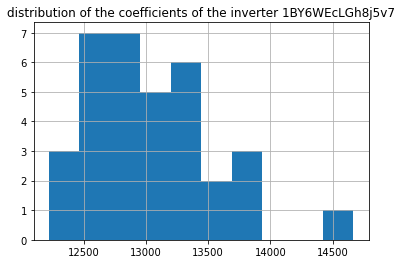

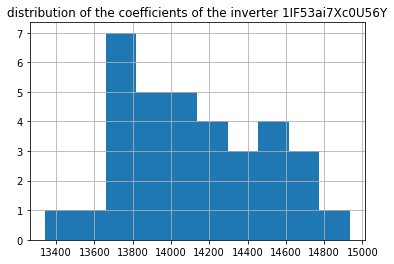

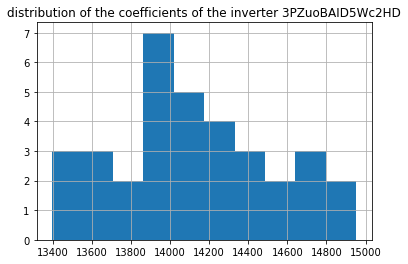

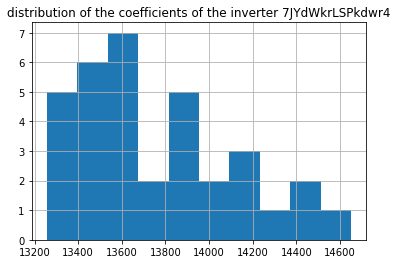

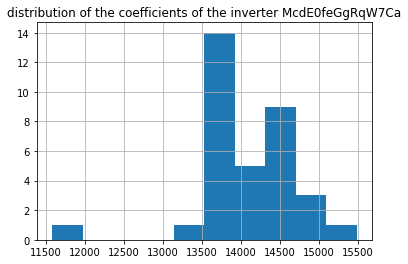

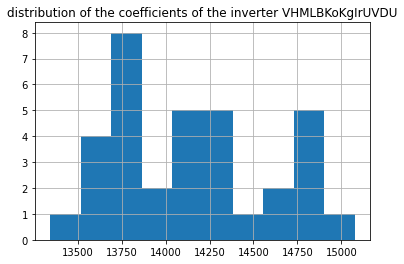

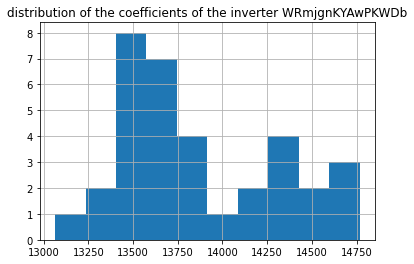

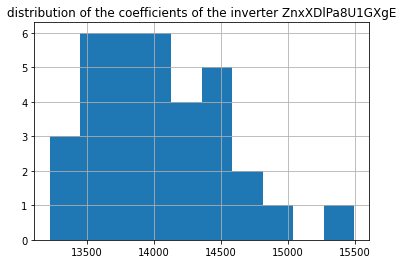

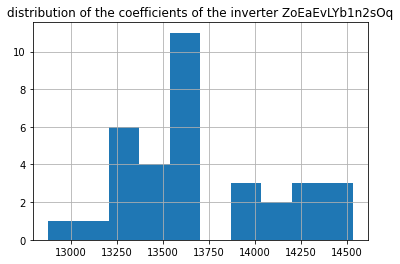

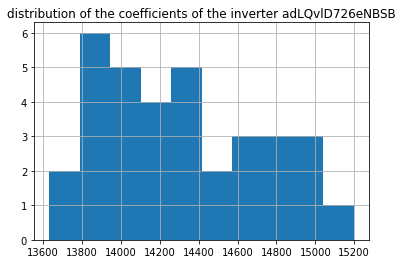

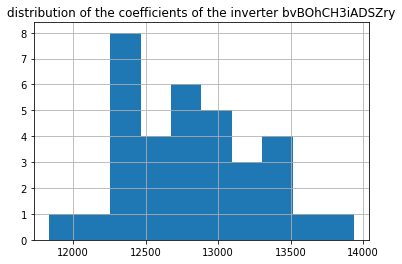

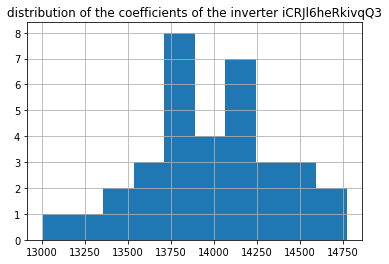

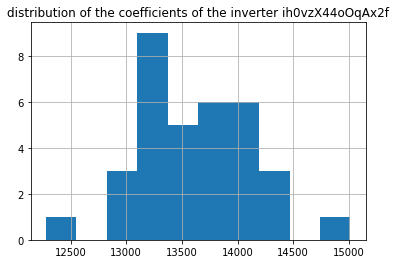

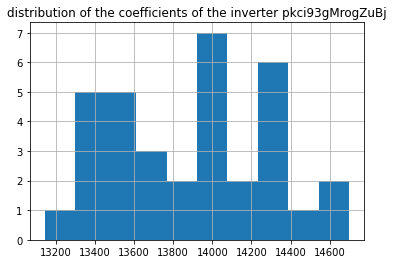

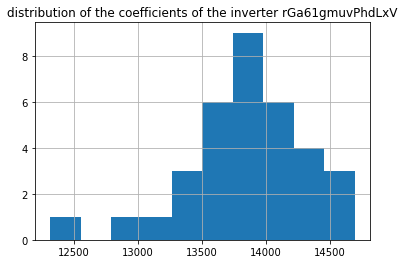

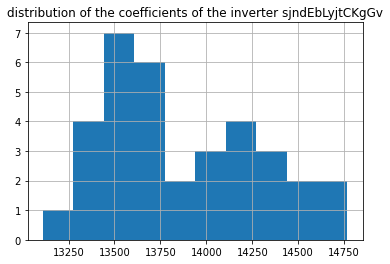

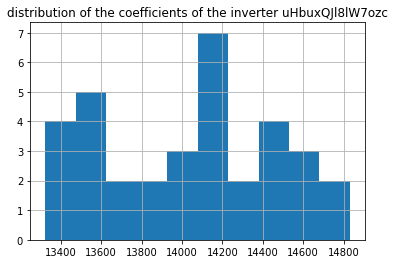

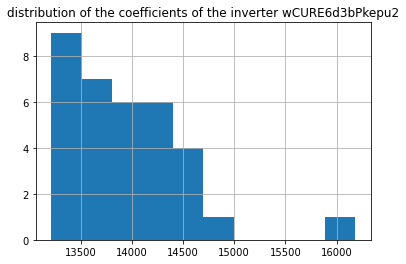

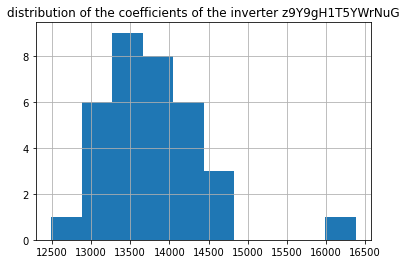

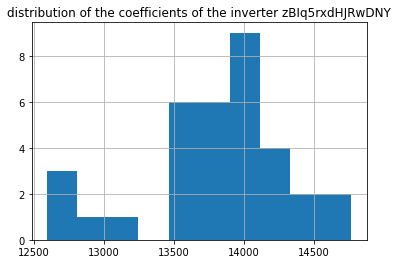

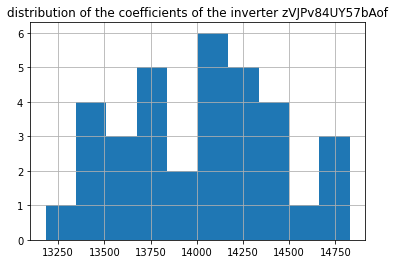

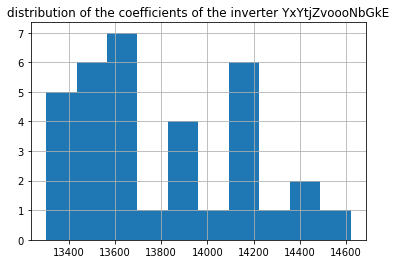

In [186]:
for i in conversion_data_lowT.Inverter.unique():
    inv=conversion_data_lowT[conversion_data_lowT.Inverter== i]
    inv.Conversion_coeff.hist()
    plt.title('distribution of the coefficients of the inverter '+ i)
    plt.show()

In [117]:
inv13=conversion_data[conversion_data.Inverter== conversion_data.Inverter.unique()[13]]
inv13[inv13.Conversion_coeff==inv13.Conversion_coeff.min()]

,Inverter,Day,Conversion_coeff
459,pkci93gMrogZuBj,153,11929.817139


In [120]:
inverter13

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,TIME,Time,HOUR,Conversion_coeff,residuals
13,2020-05-15 06:00:00,4135001,pkci93gMrogZuBj,37.375000,3.600000,0.000000,7169102.000,4135001,HmiyD2TTLFNqkNe,24.088446,22.206757,0.005887,136,360,06:00:00,6,13504.254357,-42.123967
34,2020-05-15 06:15:00,4135001,pkci93gMrogZuBj,307.142857,29.671429,2.571429,7169104.571,4135001,HmiyD2TTLFNqkNe,24.011635,22.353459,0.022282,136,375,06:15:00,6,13504.254357,6.246362
56,2020-05-15 06:30:00,4135001,pkci93gMrogZuBj,687.000000,66.575000,14.250000,7169116.250,4135001,HmiyD2TTLFNqkNe,23.976731,22.893282,0.049410,136,390,06:30:00,6,13504.254357,19.758521
78,2020-05-15 06:45:00,4135001,pkci93gMrogZuBj,1264.142857,123.114286,37.142857,7169139.143,4135001,HmiyD2TTLFNqkNe,24.218990,24.442444,0.095394,136,405,06:45:00,6,13504.254357,-24.088109
100,2020-05-15 07:00:00,4135001,pkci93gMrogZuBj,1861.625000,182.475000,77.875000,7169179.875,4135001,HmiyD2TTLFNqkNe,24.537398,27.185653,0.141940,136,420,07:00:00,7,13504.254357,-55.174850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36519,2020-06-17 17:45:00,4135001,pkci93gMrogZuBj,958.571429,93.100000,5916.428571,7415394.429,4135001,HmiyD2TTLFNqkNe,24.174170,25.950272,0.065259,169,1065,17:45:00,17,14176.479485,33.434736
36541,2020-06-17 18:00:00,4135001,pkci93gMrogZuBj,606.571429,58.742857,5934.285714,7415412.286,4135001,HmiyD2TTLFNqkNe,24.130349,25.080925,0.041940,169,1080,18:00:00,18,14176.479485,12.016050
36563,2020-06-17 18:15:00,4135001,pkci93gMrogZuBj,336.500000,32.525000,5946.250000,7415424.250,4135001,HmiyD2TTLFNqkNe,24.038157,24.068250,0.023446,169,1095,18:15:00,18,14176.479485,4.122494
36585,2020-06-17 18:30:00,4135001,pkci93gMrogZuBj,75.000000,7.242857,5951.285714,7415429.286,4135001,HmiyD2TTLFNqkNe,23.840239,22.968658,0.007007,169,1110,18:30:00,18,14176.479485,-24.333030


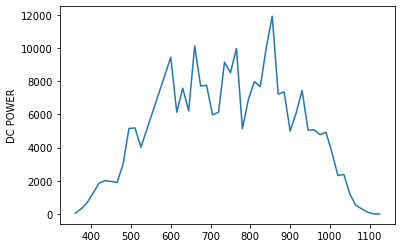

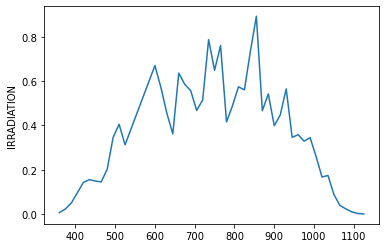

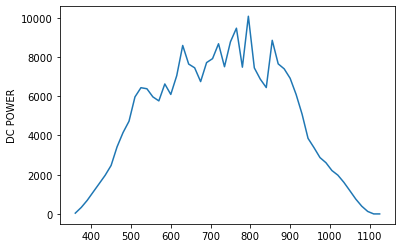

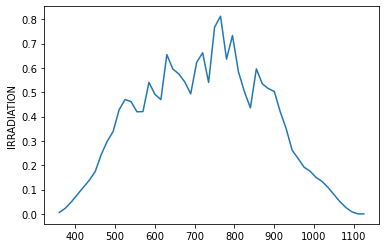

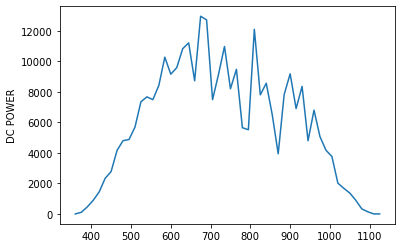

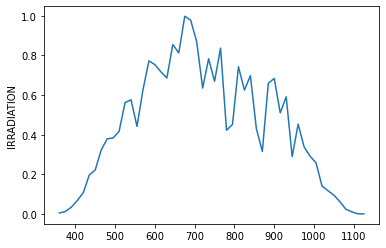

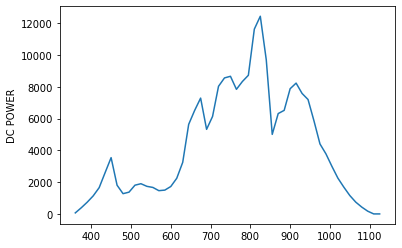

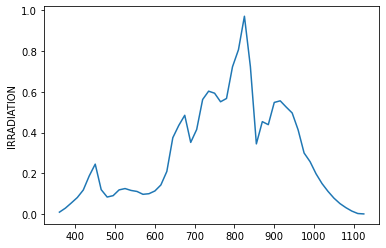

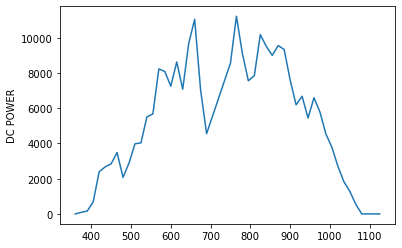

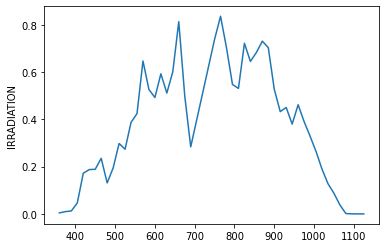

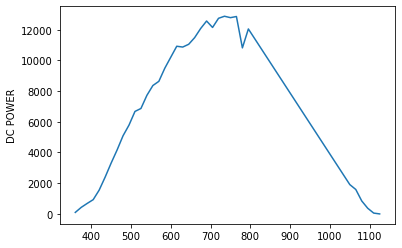

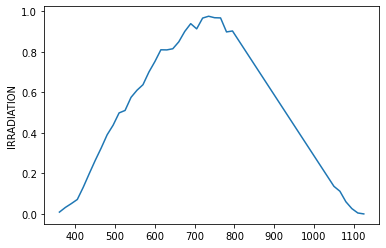

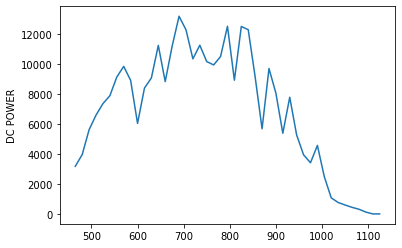

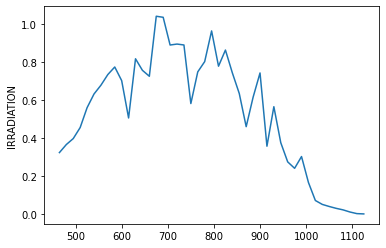

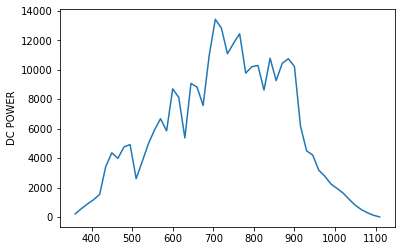

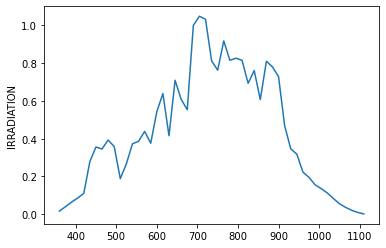

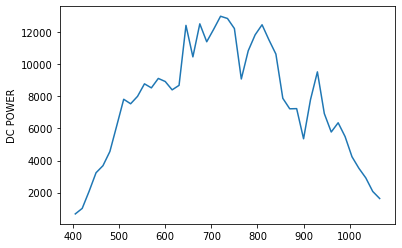

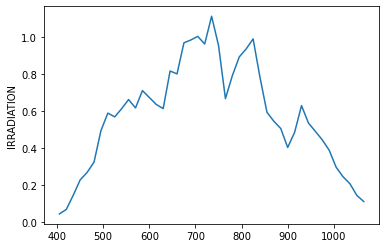

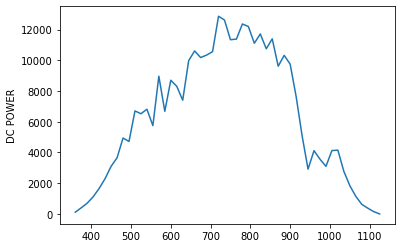

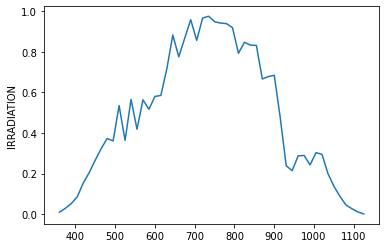

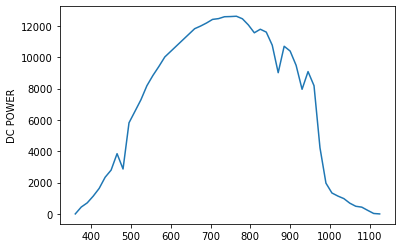

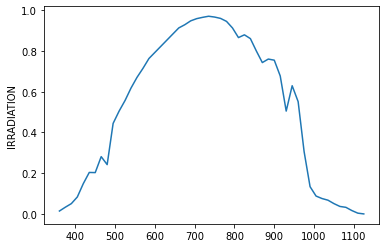

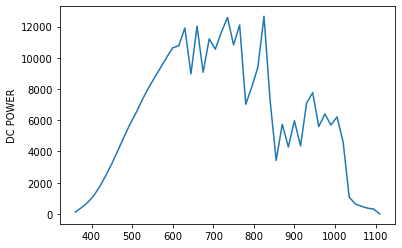

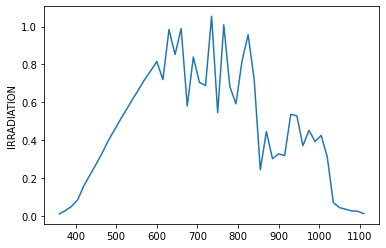

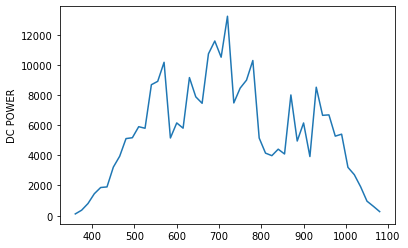

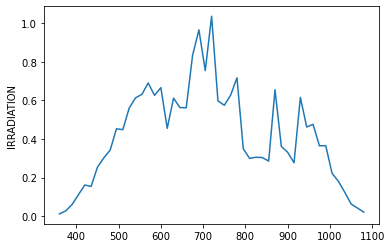

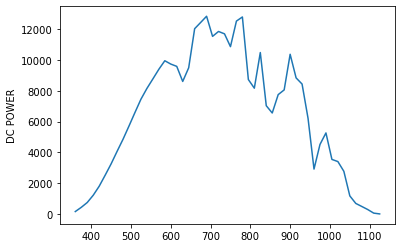

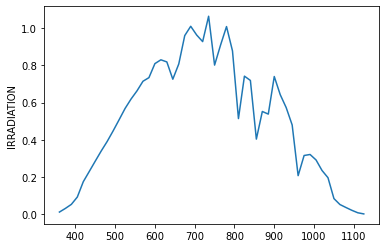

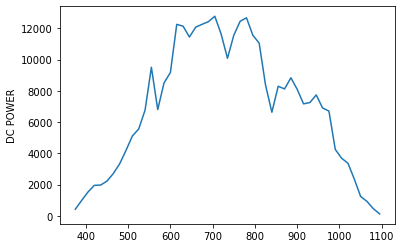

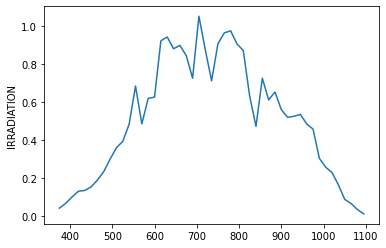

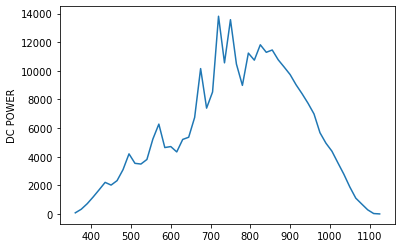

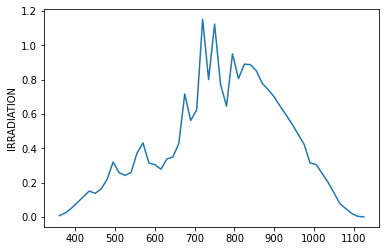

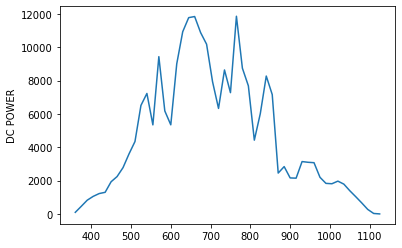

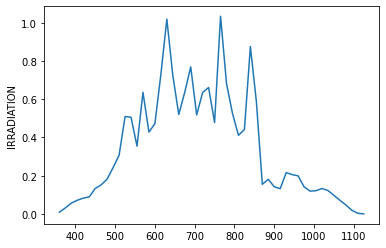

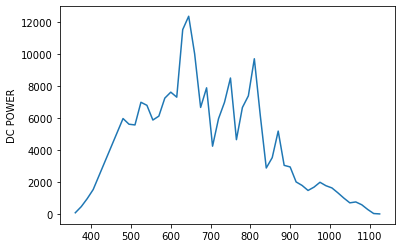

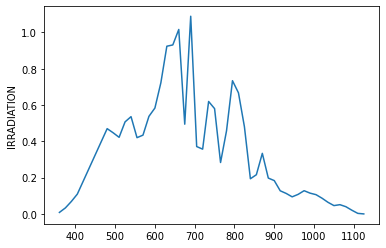

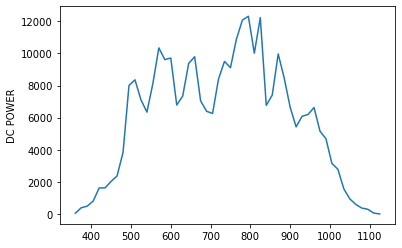

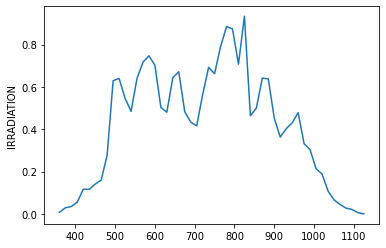

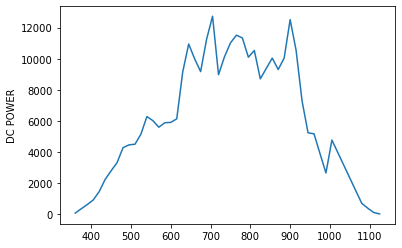

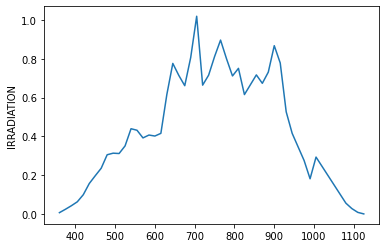

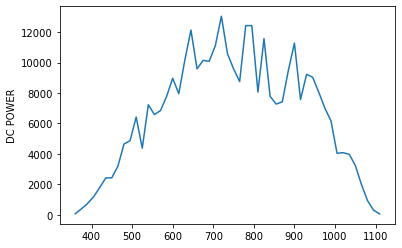

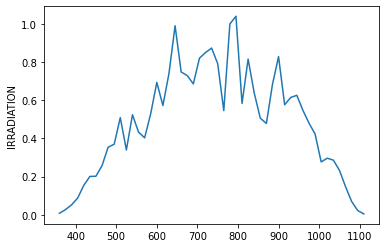

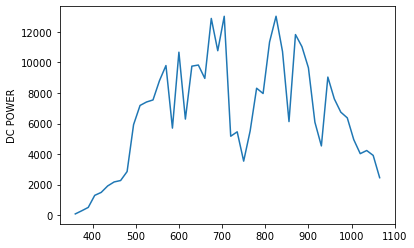

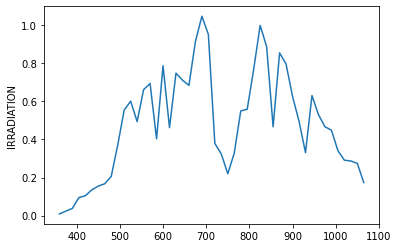

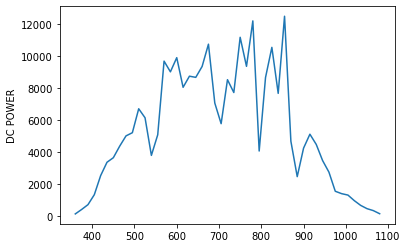

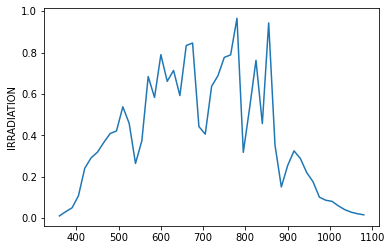

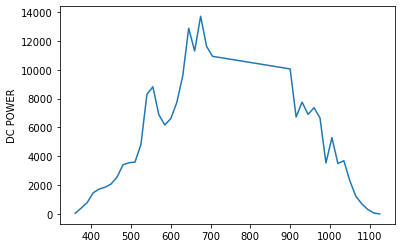

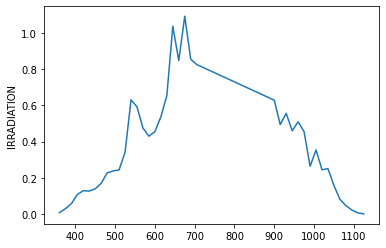

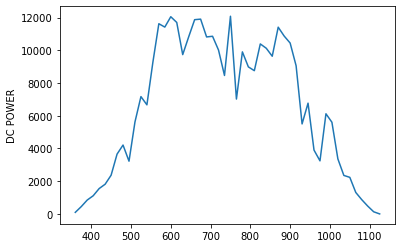

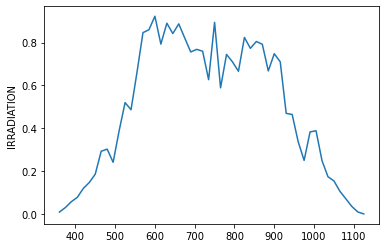

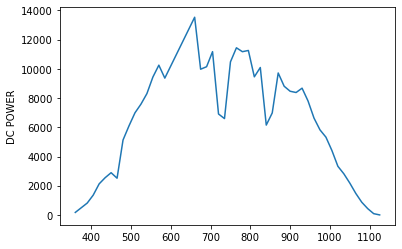

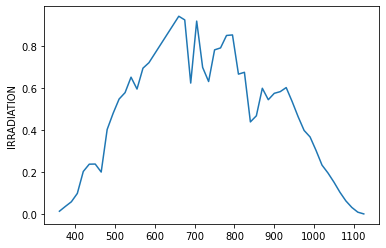

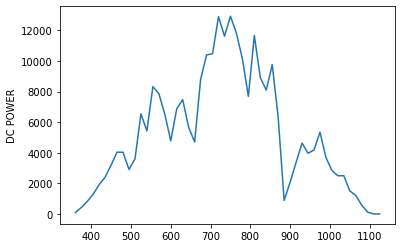

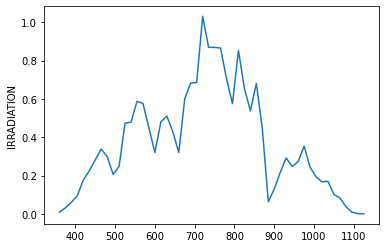

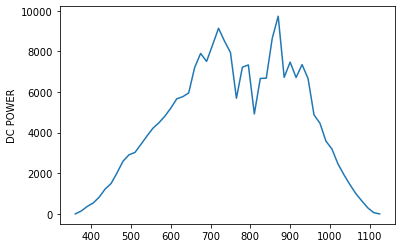

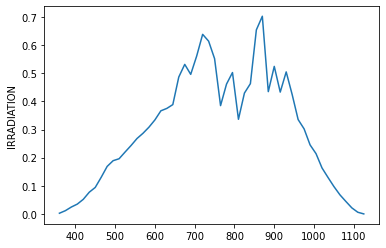

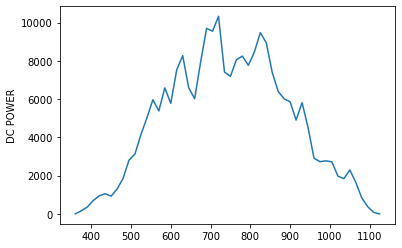

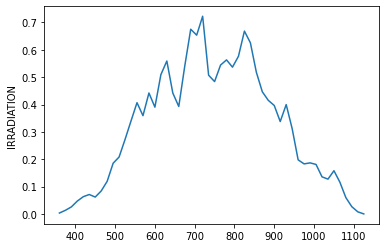

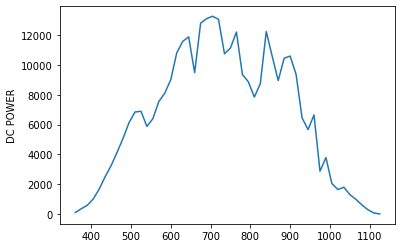

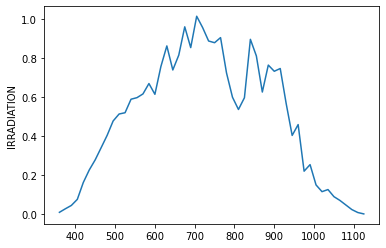

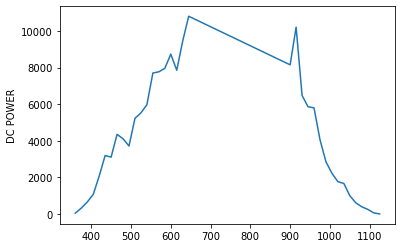

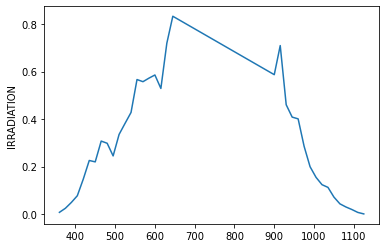

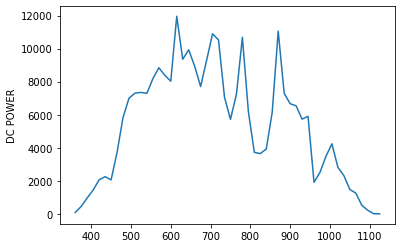

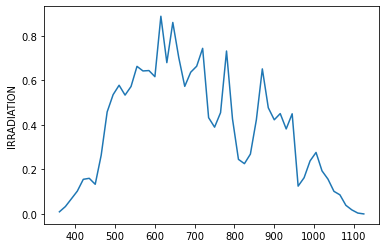

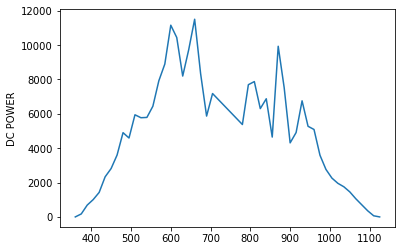

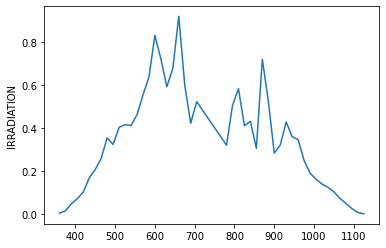

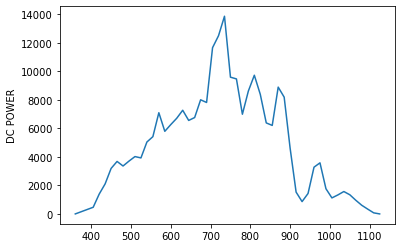

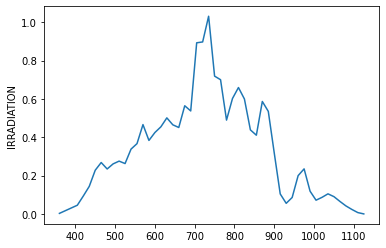

In [122]:
inverter13=clean_data[clean_data.SOURCE_KEY==conversion_data.Inverter.unique()[13]]
for a, day in inverter13.groupby(inverter13.DAY):
    scale = day.IRRADIATION.max() / day.DC_POWER.max()
    plt.figure()
    plt.plot(day.TIME, day.DC_POWER)
    plt.ylabel('DC POWER')
    plt.figure()
    plt.plot(day.TIME, day.IRRADIATION)
    plt.ylabel('IRRADIATION')
    #plt.title('DC and irradiation profile of inverter 0 on day '+str(a))
    plt.show()

In [18]:
day153=clean_data[clean_data.DAY==153]
day153inv13= day153[day153.SOURCE_KEY==conversion_data.Inverter.unique()[13]]

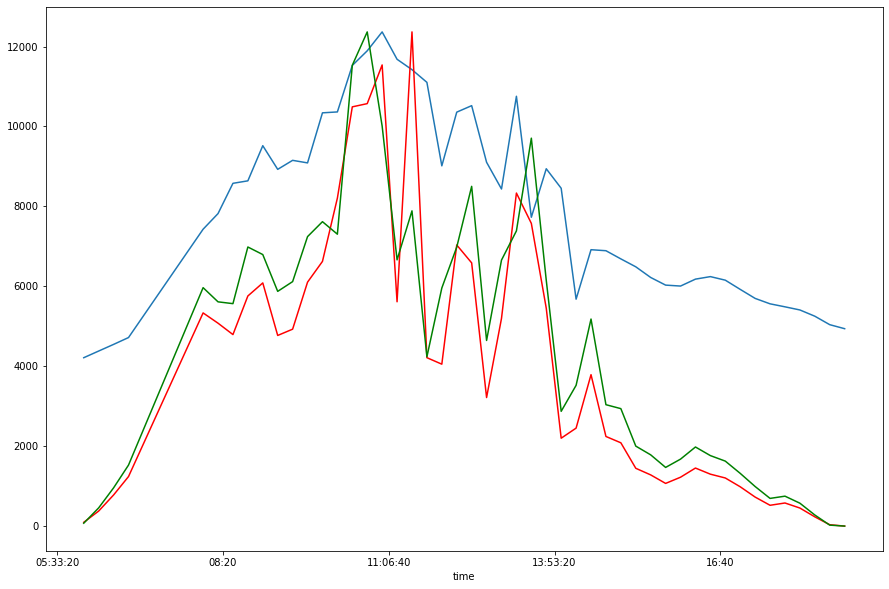

In [19]:
plt.figure(figsize=(15, 10))
scale = day153inv13.DC_POWER.max() / day153inv13.IRRADIATION.max()
scale1 = day153inv13.DC_POWER.max() / day153inv13.MODULE_TEMPERATURE.max()
plt.plot(day153inv13.Time, day153inv13.MODULE_TEMPERATURE*scale1)
plt.plot(day153inv13.Time, day153inv13.IRRADIATION*scale, color='red')
plt.plot(day153inv13.Time, day153inv13.DC_POWER , color='green')
plt.show()

I drew this plot to try and see the reason why the coefficient was low, but couldn't understand much.
I'm leaving this you notice something.